In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import loader
import plot
import helpers
import importlib
importlib.reload(loader)
importlib.reload(plot)
importlib.reload(helpers)
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import ShuffleSplit, cross_val_score, train_test_split, StratifiedKFold, learning_curve
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.optimizers import RMSprop
from sklearn.ensemble import AdaBoostClassifier

In [3]:
data = loader.load_cancer_data()

In [4]:
features = [col for col in data.columns if col != "target"]
X = data[features]
y = data["target"]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

In [6]:
# Normalize input data
scaler = MinMaxScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.fit_transform(X_test)

In [53]:
base_tree = DecisionTreeClassifier(criterion='entropy', random_state=1)

In [54]:
basic = AdaBoostClassifier(base_estimator=base_tree)
basic.get_params()
n_trees = [10, 25, 50, 100]
ccp_alphas = [0., 0.00249353, 0.00250183, 0.00491206, 0.00496107, 0.00603015, 0.0080402 , 0.00860731, 0.00948431, 0.02928727, 0.03072074, 0.34564179]
param_grid = dict(n_estimators=n_trees, base_estimator__ccp_alpha=ccp_alphas)
grid = GridSearchCV(estimator=basic, param_grid=param_grid, return_train_score=True)
grid_result = grid.fit(X_train, y_train)

In [67]:
res = grid_result.cv_results_
res_df = helpers.scikit_cv_result_to_df(res)
res_df.sort_values(by='rank_test_score')

mean_fit_time  std_fit_time  \
base_estimator__ccp_alpha n_estimators                                
0.030721                  100                1.485498      0.046097   
                          50                 0.745428      0.014242   
0.029287                  100                1.455818      0.052658   
                          50                 0.737976      0.030966   
                          25                 0.362224      0.012999   
0.009484                  100                0.572493      0.682926   
0.030721                  25                 0.371019      0.012973   
0.002502                  100                0.014747      0.000548   
0.009484                  50                 0.303825      0.352885   
0.008607                  100                0.016033      0.000533   
0.008040                  50                 0.015660      0.000483   
0.004961                  50                 0.015327      0.000715   
0.009484                  25                 0.148581      0.163395   
0.004912                  50                 0.015641      0.000613   
0.000000                  100                0.014728      0.000498   
0.008040                  25                 0.016245      0.000676   
0.006030                  50                 0.015716      0.000515   
0.008040                  100                0.015376      0.000633   
0.002494                  10                 0.014866      0.000479   
                          100                0.015133      0.000620   
0.004912                  25                 0.015554      0.000750   
                          10                 0.014859      0.000530   
0.008607                  50                 0.015225      0.000759   
0.009484                  10                 0.064910      0.060422   
0.006030                  100                0.015934      0.001150   
0.004912                  100                0.015962      0.000625   
0.002502                  25                 0.015142      0.000552   
0.002494                  25                 0.015553      0.001090   
0.000000                  50                 0.014721      0.000431   
0.004961                  25                 0.015460      0.000831   
                          10                 0.015087      0.000501   
0.008607                  10                 0.015672      0.000578   
                          25                 0.016020      0.000477   
0.002494                  50                 0.015189      0.000681   
0.004961                  100                0.015132      0.000826   
0.006030                  10                 0.015181      0.000809   
0.002502                  10                 0.014701      0.000568   
0.006030                  25                 0.015617      0.000815   
0.029287                  10                 0.142591      0.006269   
0.345642                  10                 0.137469      0.008954   
                          25                 0.345219      0.014150   
                          100                1.327656      0.103925   
                          50                 0.655257      0.028221   
0.002502                  50                 0.014954      0.000348   
0.000000                  25                 0.014839      0.000657   
0.008040                  10                 0.016002      0.000712   
0.000000                  10                 0.014915      0.000841   
0.030721                  10                 0.147207      0.005726   

                                        mean_score_time  std_score_time  \
base_estimator__ccp_alpha n_estimators                                    
0.030721                  100                  0.047332        0.001768   
                          50                   0.028089        0.003649   
0.029287                  100                  0.045796        0.001847   
                          50                   0.025367        0.000724   
                          25           

In [57]:
res_df.sort_values(by='rank_test_score')[helpers.get_useful_cv_columns()]

mean_fit_time  mean_score_time  \
base_estimator__ccp_alpha n_estimators                                   
0.030721                  100                1.485498         0.047332   
                          50                 0.745428         0.028089   
0.029287                  100                1.455818         0.045796   
                          50                 0.737976         0.025367   
                          25                 0.362224         0.014414   
0.009484                  100                0.572493         0.020036   
0.030721                  25                 0.371019         0.014259   
0.002502                  100                0.014747         0.004314   
0.009484                  50                 0.303825         0.012988   
0.008607                  100                0.016033         0.004680   
0.008040                  50                 0.015660         0.004707   
0.004961                  50                 0.015327         0.004451   
0.009484                  25                 0.148581         0.008315   
0.004912                  50                 0.015641         0.004507   
0.000000                  100                0.014728         0.004295   
0.008040                  25                 0.016245         0.004919   
0.006030                  50                 0.015716         0.004626   
0.008040                  100                0.015376         0.004335   
0.002494                  10                 0.014866         0.004312   
                          100                0.015133         0.004098   
0.004912                  25                 0.015554         0.004663   
                          10                 0.014859         0.004213   
0.008607                  50                 0.015225         0.004537   
0.009484                  10                 0.064910         0.006021   
0.006030                  100                0.015934         0.004862   
0.004912                  100                0.015962         0.004707   
0.002502                  25                 0.015142         0.004356   
0.002494                  25                 0.015553         0.004508   
0.000000                  50                 0.014721         0.004308   
0.004961                  25                 0.015460         0.004535   
                          10                 0.015087         0.004266   
0.008607                  10                 0.015672         0.004563   
                          25                 0.016020         0.004791   
0.002494                  50                 0.015189         0.004264   
0.004961                  100                0.015132         0.004260   
0.006030                  10                 0.015181         0.004301   
0.002502                  10                 0.014701         0.004152   
0.006030                  25                 0.015617         0.004540   
0.029287                  10                 0.142591         0.007976   
0.345642                  10                 0.137469         0.008323   
                          25                 0.345219         0.015393   
                          100                1.327656         0.046833   
                          50                 0.655257         0.024998   
0.002502                  50                 0.014954         0.004279   
0.000000                  25                 0.014839         0.004136   
0.008040                  10                 0.016002         0.004916   
0.000000                  10                 0.014915         0.004216   
0.030721                  10                 0.147207         0.008324   

                                        mean_test_score  mean_train_score  
base_estimator__ccp_alpha n_estimators                                     
0.030721                  100                  0.969810          1.000000  
                          50                   0.964778          1.000000  
0.029287                  100      

In [73]:
res_df.xs(0.03072074, level='base_estimator__ccp_alpha')[helpers.get_useful_cv_columns()]

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score
n_estimators,,,,
10,0.147207,0.008324,0.929652,1.0
25,0.371019,0.014259,0.954715,1.0
50,0.745428,0.028089,0.964778,1.0
100,1.485498,0.047332,0.969810,1.0


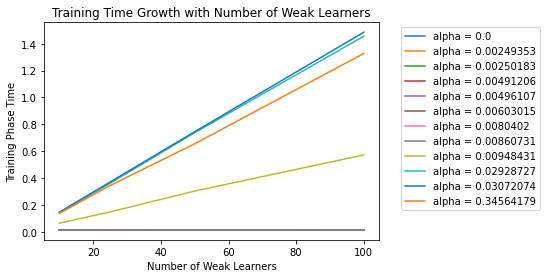

In [88]:
for alpha in ccp_alphas:
    plt.plot(n_trees, res_df.xs(alpha, level='base_estimator__ccp_alpha')['mean_fit_time'], label=f"alpha = {alpha}")
plt.title('Training Time Growth with Number of Weak Learners')
plt.ylabel('Training Phase Time')
plt.xlabel('Number of Weak Learners')
plt.legend(loc="best", bbox_to_anchor=(1.05, 1))
plt.show()

In [58]:
ten = res_df.xs(10, level='n_estimators')
twentyfive = res_df.xs(25, level='n_estimators')
fifty = res_df.xs(50, level='n_estimators')
hundred = res_df.xs(100, level='n_estimators')

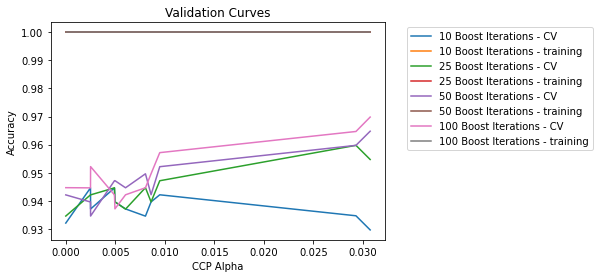

In [80]:
plt.plot(ccp_alphas[:-1], ten['mean_test_score'].iloc[:-1], label='10 Boost Iterations - CV')
plt.plot(ccp_alphas[:-1], ten['mean_train_score'].iloc[:-1],  label='10 Boost Iterations - training')

plt.plot(ccp_alphas[:-1], twentyfive['mean_test_score'].iloc[:-1],  label='25 Boost Iterations - CV')
plt.plot(ccp_alphas[:-1], twentyfive['mean_train_score'].iloc[:-1],  label='25 Boost Iterations - training')

plt.plot(ccp_alphas[:-1], fifty['mean_test_score'].iloc[:-1],  label='50 Boost Iterations - CV')
plt.plot(ccp_alphas[:-1], fifty['mean_train_score'].iloc[:-1],  label='50 Boost Iterations - training')

plt.plot(ccp_alphas[:-1], hundred['mean_test_score'].iloc[:-1],  label='100 Boost Iterations - CV')
plt.plot(ccp_alphas[:-1], hundred['mean_train_score'].iloc[:-1],  label='100 Boost Iterations - training')

plt.legend(loc="best", bbox_to_anchor=(1.05, 1))
plt.title('Validation Curves')
plt.ylabel('Accuracy')
plt.xlabel('CCP Alpha')
plt.show()

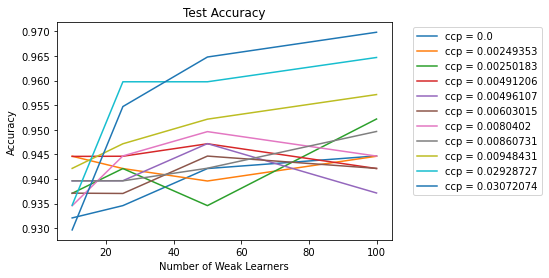

In [87]:
for alpha in ccp_alphas[:-1]:
    plt.plot(n_trees, res_df.xs(alpha, level='base_estimator__ccp_alpha')['mean_test_score'], label=f'ccp = {alpha}')
plt.legend(loc="best", bbox_to_anchor=(1.05, 1))
plt.title('Test Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Number of Weak Learners')
plt.show()

In [64]:
best_base_tree = DecisionTreeClassifier(criterion='entropy', ccp_alpha=0.030721, random_state=1)
best_model = AdaBoostClassifier(base_estimator=best_base_tree, n_estimators=100)

In [65]:
best_model.fit(X_train, y_train)
y_test_pred = best_model.predict(X_test)
accuracy_score(y_test, y_test_pred)

0.9590643274853801

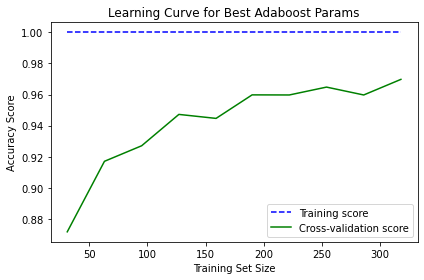

In [79]:
plot.plot_learning_curve(best_model, X_train, y_train, title='Learning Curve for Best Adaboost Params')